In [28]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("data.csv")
df.head()

,Label,Text
0,cricket,"b""Kumble breaks Kapil's record\n\nFirst Test, ..."
1,cricket,"b""Aussies tighten grip\n\nFirst Test, Perth, d..."
2,cricket,b'Vaughan ready for South Africa\n\nSkipper Mi...
3,cricket,b'World XI triumph in tsunami match\n\nTsunami...
4,cricket,b'Shoaib ruled out of Test series\n\nFast bowl...


In [25]:
#calcul du nombre de stopwords
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

def word_average(x):
    mots = x.split()
    return sum(len(mot)  for mot in mots ) / len(mots)


def text_EDA(df):
    
    # nombre de mots par document
    df["word_count"] = df["Text"].map(lambda x: len(str(x).split()))
    # nombre de caractère par document
    df["char_count"] =df["Text"].map(lambda x : len(str(x)))
    # nombre moyen de mots par document
    df["word_average"] = df["Text"].map(lambda x : word_average(x))
    # nombre de caracteres spéciaux dans chaque ligne
    df["char_special: /"] = df["Text"].map(lambda x :len( [x for x in x.split() if "/" in x]))
    df["char_special: @"] = df["Text"].map(lambda x :len( [x for x in x.split() if "@" in x]))
    # nombre de digits sur chaque ligne
    df["car_digit"] = df["Text"].map(lambda x :len( [x for x in x.split() if x.isdigit()]))
    #calcul du nombre de stop words sur chaque ligne
    df["stopwords"] =df["Text"].map(lambda x : len( [x for x in x.split() if x in stopwords.words('english')] ))
    
    return df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davidjeannette/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
text_EDA(df)

,Label,Text,word_count,char_count,word_average,char_special: /,char_special: @,car_digit,stopwords
0,cricket,"b""Kumble breaks Kapil's record\n\nFirst Test, ...",331,1953,4.903323,0,0,6,101
1,cricket,"b""Aussies tighten grip\n\nFirst Test, Perth, d...",444,2638,4.943694,0,0,11,154
2,cricket,b'Vaughan ready for South Africa\n\nSkipper Mi...,524,2987,4.702290,0,0,3,218
3,cricket,b'World XI triumph in tsunami match\n\nTsunami...,530,3157,4.958491,2,0,6,167
4,cricket,b'Shoaib ruled out of Test series\n\nFast bowl...,411,2383,4.800487,0,0,4,170


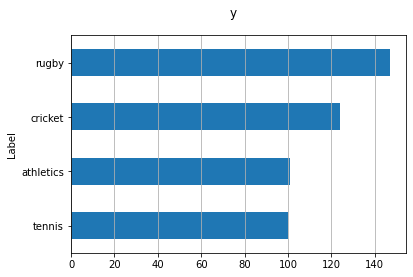

In [30]:
fig, ax = plt.subplots()
fig.suptitle("y", fontsize=12)
df["Label"].reset_index().groupby("Label").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

**Commentaires**:

- Nous pouvons constater que les classes sont débalancées et nous pourrions utiliser les métriques f1-score, recall et precision pour evaluer notre modèle.